In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from logisticregression import RegressaoLogistica
from metricas import acuracia,precisao,revocacao, f1, matriz_confusao
from validacaocruzada import validacao_cruzada, calcular_estatisticas_metricas
from sklearn.metrics import roc_curve, auc

In [2]:
data=pd.read_csv("breast.csv", header=None)


In [3]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values.reshape(-1, 1)


In [4]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Normalizar os dados de treinamento
escala = MinMaxScaler()
X_normalizado_treino = escala.fit_transform(X_treino)

# Normalizar os dados de teste
X_normalizado_teste = escala.transform(X_teste)



In [6]:
modelo_gd = RegressaoLogistica(a=0.01, epocas=2000)
modelo_gd.fit_gd(X_normalizado_treino, y_treino)
previsao = modelo_gd.predict(X_normalizado_teste)


In [7]:
acuracia = acuracia(y_teste, previsao)
print("Acurácia:", acuracia)

precisao = precisao(y_teste, previsao, classe_positiva=1)
print("Precisão:", precisao)

revocacao = revocacao(y_teste, previsao, classe_positiva=1)
print("Revocação:", revocacao)

f1 = f1(precisao, revocacao)
print("F1:", f1)

conf_matrix = matriz_confusao(y_teste.flatten(), previsao, num_classes=2)
print("Matriz de Confusão:")
for row in conf_matrix:
    print(row)


Acurácia: 0.9473684210526315
Precisão: 0.922077922077922
Revocação: 1.0
F1: 0.9594594594594594
Matriz de Confusão:
[37, 6]
[0, 71]


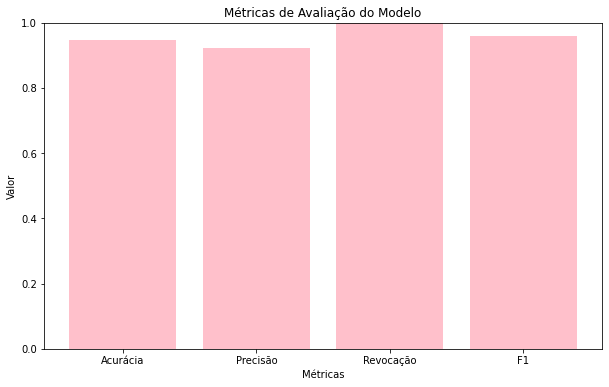

In [8]:

# Métricas
metricas = ['Acurácia', 'Precisão', 'Revocação', 'F1']
valores = [acuracia, precisao, revocacao, f1]

# Plotagem
plt.figure(figsize=(10, 6))
plt.bar(metricas, valores, color='pink')
plt.title('Métricas de Avaliação do Modelo')
plt.xlabel('Métricas')
plt.ylabel('Valor')
plt.ylim(0, 1)
plt.show()


In [9]:

acuracias, precisoes, revocacoes, f1_scores = validacao_cruzada(modelo_gd, X_normalizado_treino, y_treino)

acuracia_media, acuracia_desvio_padrao = calcular_estatisticas_metricas(acuracias)
print("Acurácia média:", acuracia_media)
print("Desvio padrão das acurácias:", acuracia_desvio_padrao)

precisao_media, precisao_desvio_padrao = calcular_estatisticas_metricas(precisoes)
print("Precisão média:", precisao_media)
print("Desvio padrão das precisões:", precisao_desvio_padrao)

revocacao_media, revocacao_desvio_padrao = calcular_estatisticas_metricas(revocacoes)
print("Revocação média:", revocacao_media)
print("Desvio padrão das revocações:", revocacao_desvio_padrao)

f1_media, f1_desvio_padrao = calcular_estatisticas_metricas(f1_scores)
print("F1 médio:", f1_media)
print("Desvio padrão do F1:", f1_desvio_padrao)


Acurácia média: 0.9111111111111112
Desvio padrão das acurácias: 0.03583225665910468
Precisão média: 0.8857522358637977
Desvio padrão das precisões: 0.05367020056976245
Revocação média: 0.9871663504111321
Desvio padrão das revocações: 0.02168652451682128
F1 médio: 0.9324803427866465
Desvio padrão do F1: 0.028348587383631614


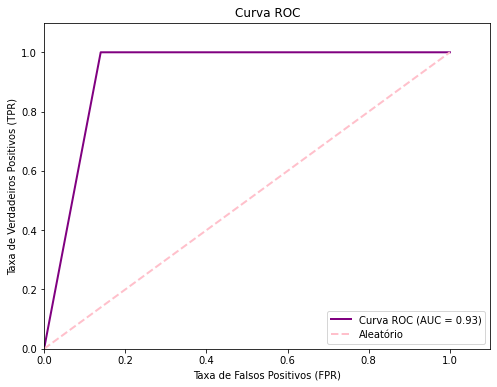

In [10]:
# Calcular as taxas de falsos positivos (FPR) e verdadeiros positivos (TPR)
fpr, tpr, thresholds = roc_curve(y_teste, previsao)
# Calcular a área sob a curva ROC (AUC)
roc_auc = auc(fpr, tpr)
# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='purple', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='pink', linestyle='--', lw=2, label='Aleatório')
plt.xlim([0.0, 1.1])
plt.ylim([0.0, 1.1])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()
